In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [17]:
train_dir = '/content/drive/MyDrive/Data-Deep_Learning/dataset-vgg16/train'
test_dir = '/content/drive/MyDrive/Data-Deep_Learning/dataset-vgg16/test'

train_data_car = os.listdir(train_dir + '/Car/')
train_data_bike = os.listdir(train_dir + '/Bike/')

In [18]:
# Augmentasi data training
train_datagen = ImageDataGenerator(
        rescale=1./255,  # normalisasi gambar
        rotation_range=20,  # rotasi gambar
        width_shift_range=0.2,  # pergeseran horizontal
        height_shift_range=0.2,  # pergeseran vertikal
        shear_range=0.2,  # shear transformation
        zoom_range=0.2,  # zoom gambar
        horizontal_flip=True,  # flipping horizontal
        fill_mode='nearest')  

# Normalisasi data testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Memuat data training dan testing
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data training
        target_size=(224, 224),  # ukuran gambar
        batch_size=32,  # ukuran batch
        class_mode='categorical')  # mode kelas

test_generator = test_datagen.flow_from_directory(
        test_dir,  # direktori data testing
        target_size=(224, 224),  # ukuran gambar
        batch_size=32,  # ukuran batch
        class_mode='categorical')  # mode kelas

Found 500 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
# Compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
# Tampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [22]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    batch_size= 32,
    shuffle= True)

Epoch 1/10
16/16 [==============================] - 19s 775ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 11s 682ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
16/16 [==============================] - 12s 728ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
16/16 [==============================] - 12s 692ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
16/16 [==============================] - 11s 670ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
16/16 [==============================] - 12s 731ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 12s 740ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000

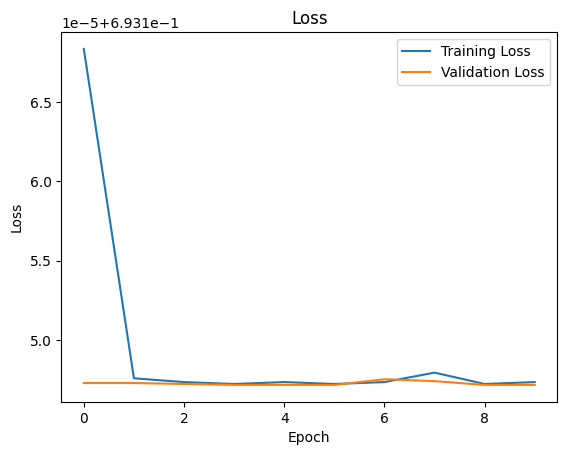

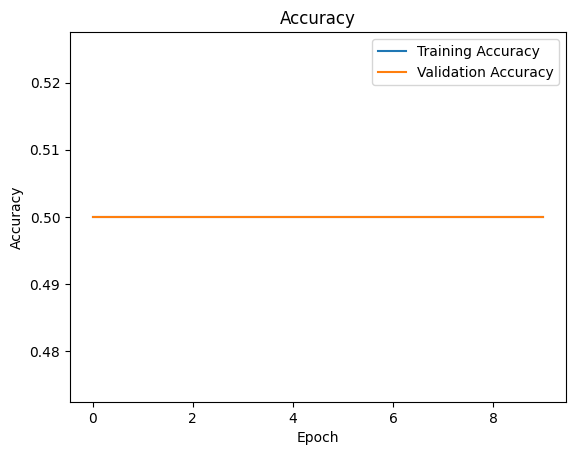

In [23]:
import matplotlib.pyplot as plt

# mengambil informasi loss dan accuracy pada setiap epoch
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# membuat plot loss pada dataset latihan dan validasi/testing
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# membuat plot akurasi pada dataset latihan dan validasi/testing
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
class_name = list(train_generator.class_indices.keys())

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Saving 27.jpeg to 27 (1).jpeg


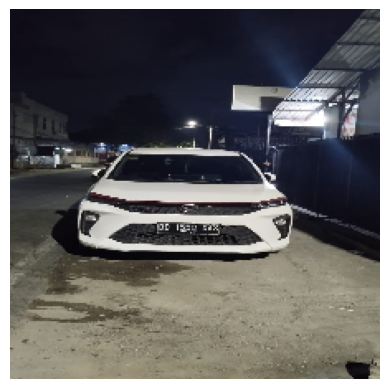

1/1 [==============================] - 0s 19ms/step

 Gambar Mobil


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import cv2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)

  plt.imshow(x/255.)
  plt.axis('off')
  plt.show()

  x = np.expand_dims(x, axis=0)
  classes = model.predict(x)
  
  if classes[0] < 0.5:
    print("\n Gambar Mobil")
  else:
    print("\n Gambar Motor")